In [2]:
import tensorflow
from tensorflow import keras

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
class CFG():
    train_csv_path = "/content/drive/MyDrive/Colab/Kaggle/PlantPathology2021/Dataset/train.csv"
    train_folder_path = "/content/drive/MyDrive/Colab/Kaggle/PlantPathology2021/Dataset/train_images"
    test_folder_path = "/content/drive/MyDrive/Colab/Kaggle/PlantPathology2021/Dataset/test_images"
    submission_path = "/content/drive/MyDrive/Colab/Kaggle/PlantPathology2021/Dataset/sample_submission.csv"

In [9]:
train_csv = pd.read_csv(CFG.train_csv_path)

In [10]:
print(f"Train images: {len(train_csv)}")
# !python --version

Train images: 18632


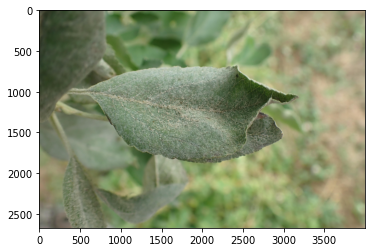

In [12]:
img = train_csv["image"][0]
img = plt.imread(f"{CFG.train_folder_path}/{img}")
plt.imshow(img)

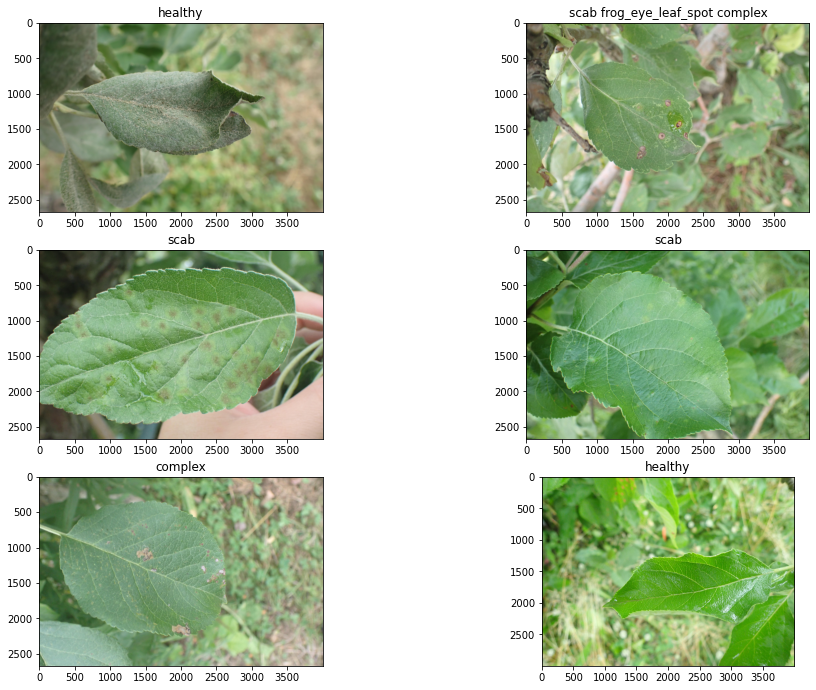

In [13]:
plt.figure(figsize=(16, 16))
for i, (img, labels) in enumerate(train_csv.to_numpy()[:6]):
    plt.subplot(4,2,i+1)
    img = plt.imread(f"{CFG.train_folder_path}/{img}")
    plt.imshow(img)
    plt.title(labels)

In [18]:
multilabel_counts = np.unique(train_csv['labels'], return_counts=True)
multilabel_counts_df = pd.DataFrame(multilabel_counts).T.sort_values(by=1, ascending=False)
multilabel_counts_df

,0,1
9,scab,4826
3,healthy,4624
1,frog_eye_leaf_spot,3181
6,rust,1860
0,complex,1602
4,powdery_mildew,1184
10,scab frog_eye_leaf_spot,686
11,scab frog_eye_leaf_spot complex,200
2,frog_eye_leaf_spot complex,165
8,rust frog_eye_leaf_spot,120


In [29]:
labels_split = [label.split(" ") for label in train_csv['labels']]
flatten = [item for sublist in labels_split for item in sublist]
labels_counts = np.unique(flatten, return_counts=True)
labels_counts_df = pd.DataFrame(labels_counts).T.sort_values(by=1, ascending=False)
labels_counts_df

,0,1
5,scab,5712
2,healthy,4624
1,frog_eye_leaf_spot,4352
0,complex,2151
4,rust,2077
3,powdery_mildew,1271
